# Modules

---

## Time Series Module [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/simple_time_series.py) | [Documentation](https://pandapower.readthedocs.io/en/develop/timeseries.html)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=sAHoJbfLhas" target="_blank">
    <img 
        src="http://img.youtube.com/vi/sAHoJbfLhas/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

<img src="https://pandapower.readthedocs.io/en/develop/_images/run_timeseries_loop.svg" height="400" style="background-color:white;">

In [38]:
import os
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

import pandapower as pp
import pandapower.networks as nw
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.timeseries.output_writer import OutputWriter


# open the grid and modify it
net = nw.example_simple()
net.gen.drop(net.gen.index, inplace=True)
pp.create_sgen(net, 5, p_mw=1)

# create the data source for the controller
cigre_timeseries = pathlib.Path("data_files", "cigre_timeseries_15min.json")

df = pd.read_json(cigre_timeseries)
ds = DFData(df)
# df.loc[:, ["pv", "wind", "residential"]].plot()
# plt.show()

# To run the powerflow, use pandapower timeseries modulue
# add controller for sgens and loads
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=["wind", "pv"], data_source=ds)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=["residential"], data_source=ds)

# add the output writer to store results
ow = OutputWriter(net, time_steps=(0, 95), output_path="./results/", output_file_type=".xlsx")
# these values are logged by default anyway and must not be explicitly set
# ow.log_variable("res_bus", "vm_pu")
# ow.log_variable("res_line", "loading_percent")

# run the time series
run_timeseries(net, time_steps=(0, 48))

recycle is set to True, but internal variables are missing


Progress: |██████████████████████████████████████████████████| 100.0% Complete



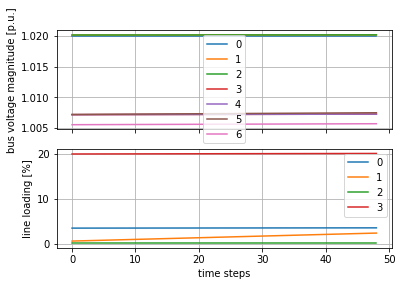

In [40]:
# plot the results

fix, axes = plt.subplots(2, 1, sharex=True)
df = pd.read_excel("./results/res_bus/vm_pu.xlsx", index_col=0)
df.plot(ax=axes[0])
axes[0].set_ylabel("bus voltage magnitude [p.u.]")
df = pd.read_excel("./results/res_line/loading_percent.xlsx", index_col=0)
df.plot(ax=axes[1])
axes[1].set_ylabel("line loading [%]")
[ax.grid() for ax in axes]
plt.xlabel("time steps")
plt.show()

---

## Control Module [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/control_module.py) | [Documentation](https://pandapower.readthedocs.io/en/v2.2.2/control.html)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=yEIsUHyTY04" target="_blank">
    <img 
        src="http://img.youtube.com/vi/yEIsUHyTY04/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [47]:
import pandapower.networks as nw
import pandapower as pp
import pandapower.control as ct

net = nw.mv_oberrhein()
ct.DiscreteTapControl(net, 114, 0.99, 1.01)
pp.runpp(net, run_control=True)
print(net.controller)

print(net.trafo.tap_pos)
print(net.res_bus.loc[net.trafo.lv_bus, "vm_pu"])

                            object  in_service  order level  initial_run  \
0  DiscreteTapControl of trafo 114        True    0.0     0         True   

                                          recycle  
0  {'trafo': True, 'gen': False, 'bus_pq': False}  
114   -1
142   -3
Name: tap_pos, dtype: int32
39     0.998267
319    1.028804
Name: vm_pu, dtype: float64


In [49]:
net = nw.mv_oberrhein()
# The results obtained donot exist in reality e.g. tap position 0.48 because tap position should be integer
# But it converges fast and comes quickly to our set point which is __0.99__ in our case
# Also gives rough idea where tap position should be
ct.ContinuousTapControl(net, 114, 0.99, 1e-5)
pp.runpp(net, run_control=True)

print(net.trafo.tap_pos)
print(net.res_bus.loc[net.trafo.lv_bus, "vm_pu"])

114   -0.482175
142   -3.000000
Name: tap_pos, dtype: float64
39     0.989994
319    1.028804
Name: vm_pu, dtype: float64


---

## Topology Search [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/topology_search.py) | [Documentation](https://pandapower.readthedocs.io/en/v2.0.0/topology/searches.html)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=ubpHrrMA63A" target="_blank">
    <img 
        src="http://img.youtube.com/vi/ubpHrrMA63A/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [1]:
# Use pandapower topology search to find shortest distance of two buses in pandapower algorithm
# Find a shortest path between bus 0 and bus 5

import pandapower.networks as nw
import pandapower.topology as top
import networkx as nx

net = nw.simple_mv_open_ring_net()
mg = top.create_nxgraph(net)
shortest = nx.shortest_path(mg, 0, 5)
print(shortest)

[0, 1, 6, 5]


---